# What are the risk correlated to COVID-19?  
**US-specific population risk**  
Alaa Hassan
> Final: Feb 6 2021

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt #plotting, math, stats
%matplotlib inline
import seaborn as sns #plotting, regressions, stats
import folium
import json
import requests

**What is the situation worldwide? Where does the US stand?**

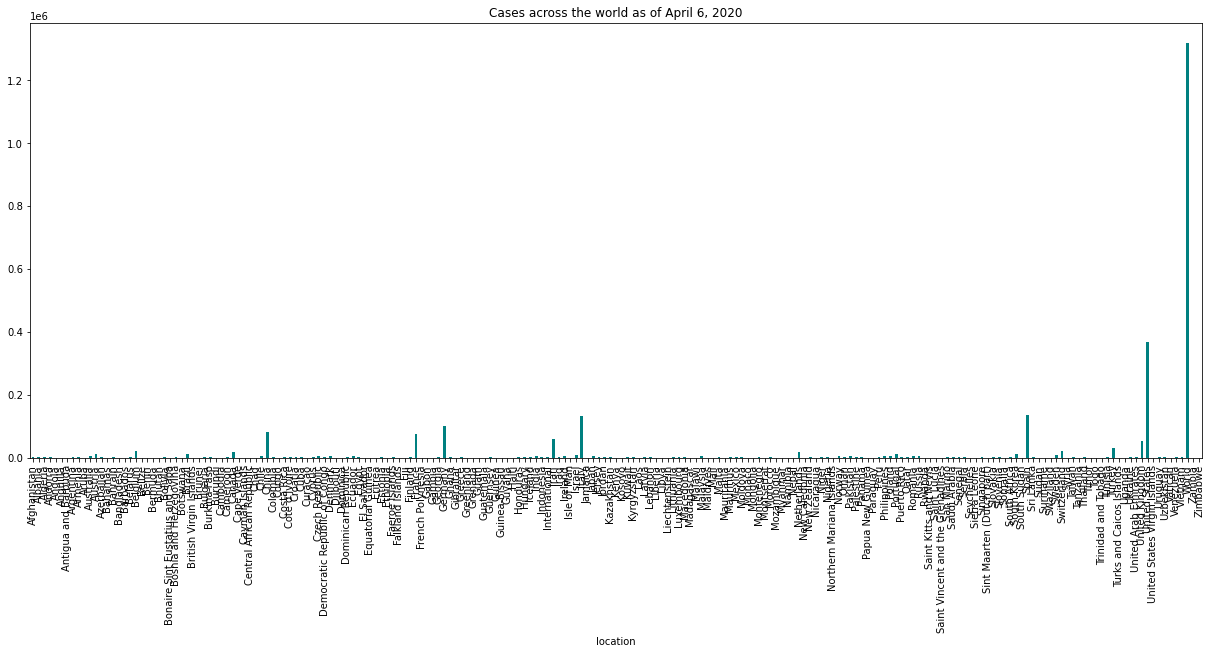

In [2]:
#Dataset from the World Health Organization
World = pd.read_csv(r"F:\Health\Data\full_data.csv")

plt.figure(figsize=(21,8)) # Figure size
plt.title('Cases across the world as of April 6, 2020') # Title
World.groupby("location")['total_cases'].max().plot(kind='bar', color='teal')

In [3]:
World.corr().style.background_gradient(cmap='magma')

,new_cases,new_deaths,total_cases,total_deaths
new_cases,1.000000,0.954600,0.951876,0.902002
new_deaths,0.954600,1.000000,0.955066,0.959213
total_cases,0.951876,0.955066,1.000000,0.972106
total_deaths,0.902002,0.959213,0.972106,1.000000


The longest line represents the world's total, not a specific country.   
If the reported data is 100% correct and properly reported, the **US** has a significantly high total of cases.   


In [4]:
df = pd.read_csv(r'F:\Health\Data\us-counties.csv')

#I droped FIPS column. 
##not relevant for this analysis.
USA=df.drop(['fips','county'], axis = 1) 
USA

,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
35693,2020-04-05,Wyoming,1,0
35694,2020-04-05,Wyoming,5,0
35695,2020-04-05,Wyoming,39,0
35696,2020-04-05,Wyoming,2,0


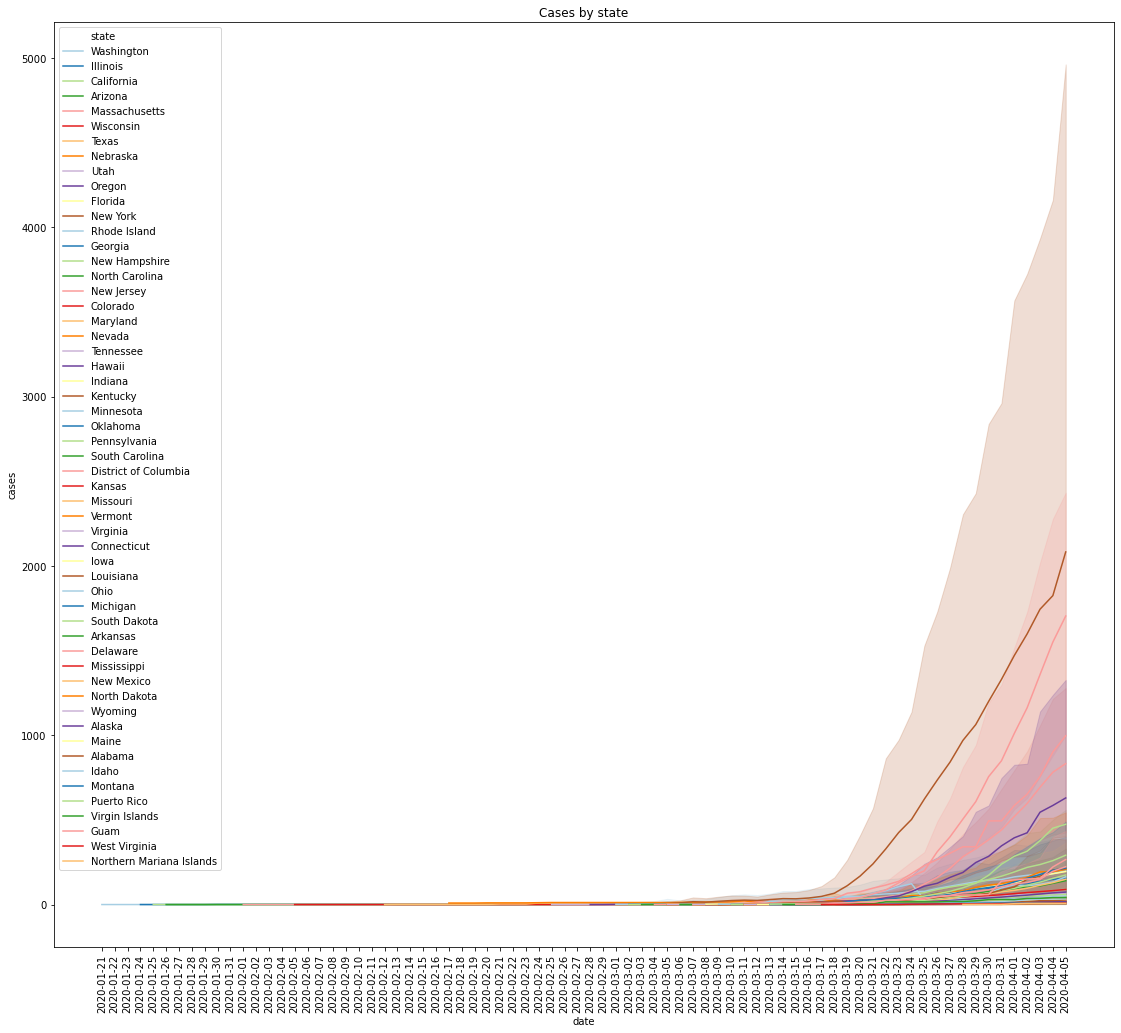

In [5]:
plt.figure(figsize=(19,17))
plt.title('Cases by state') # Title
sns.lineplot(x="date", y="cases", hue="state",data=USA, palette="Paired")
plt.xticks(USA.date.unique(), rotation=90) # All values in the x axis rotate 90 degrees
plt.show()

In [6]:
##For ease of visualization
NY=USA.loc[USA['state']== 'New York']
LA=USA.loc[USA['state']== 'Louisiana']
WA=USA.loc[USA['state']== 'Washington']
IL=USA.loc[USA['state']== 'Illinois']
Mich=USA.loc[USA['state']== 'Michigan']
PUR=USA.loc[USA['state']== 'Puerto Rico']


In [7]:
# Concatenate dataframes 
States=pd.concat([NY,LA,WA,IL,PUR,Mich]) 

States=States.sort_values(by=['date'], ascending=True)
States


,date,state,cases,deaths
0,2020-01-21,Washington,1,0
1,2020-01-22,Washington,1,0
2,2020-01-23,Washington,1,0
3,2020-01-24,Illinois,1,0
4,2020-01-24,Washington,1,0
...,...,...,...,...
34695,2020-04-05,New York,9,0
34696,2020-04-05,New York,22,1
34697,2020-04-05,New York,27,0
34690,2020-04-05,New York,30,1


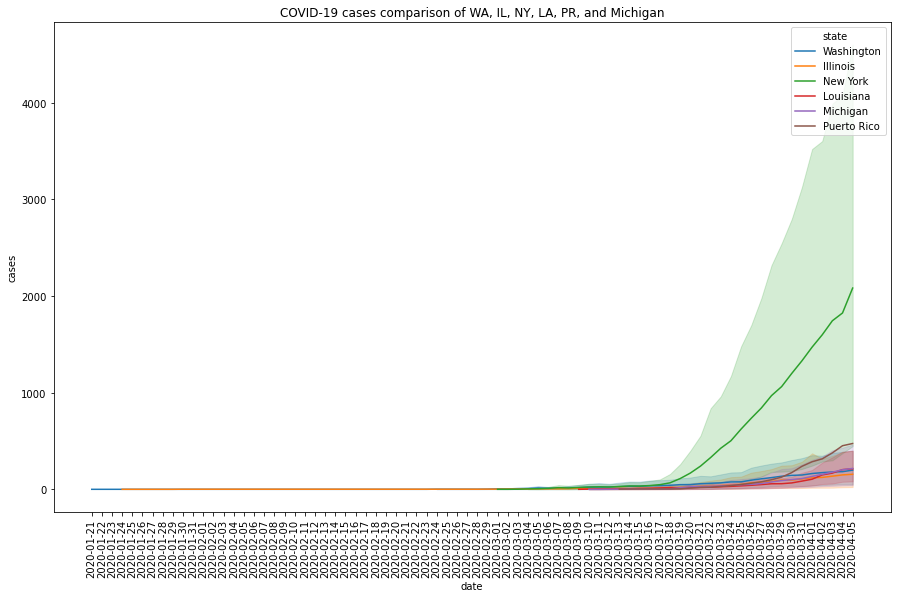

In [8]:
plt.figure(figsize=(15,9))
plt.title('COVID-19 cases comparison of WA, IL, NY, LA, PR, and Michigan') # Title
sns.lineplot(x="date", y="cases", hue="state",data=States)
plt.xticks(States.date.unique(), rotation=90) # All values in the x axis rotate 90 degrees
plt.show()

In [9]:
USAg=USA.groupby(['date']).max()
USAg

,state,cases,deaths
date,,,
2020-01-21,Washington,1,0
2020-01-22,Washington,1,0
2020-01-23,Washington,1,0
2020-01-24,Washington,1,0
2020-01-25,Washington,1,0
...,...,...,...
2020-04-01,Wyoming,47440,1374
2020-04-02,Wyoming,51810,1562
2020-04-03,Wyoming,57160,1867


In [10]:
USAg=USAg.sort_values(by=['cases'], ascending=True)
USAg

,state,cases,deaths
date,,,
2020-01-21,Washington,1,0
2020-01-28,Washington,1,0
2020-01-27,Washington,1,0
2020-01-26,Washington,1,0
2020-01-29,Washington,1,0
...,...,...,...
2020-04-01,Wyoming,47440,1374
2020-04-02,Wyoming,51810,1562
2020-04-03,Wyoming,57160,1867


**df on VULNERABILITIES in the US**

In [11]:
Vuln = pd.read_csv(r"F:\Health\Data\cdcs-social-vulnerability-index-svi-2016-overall-svi-census-tract-level.csv")

In [12]:
Vuln= Vuln[['state', 'e_uninsur', 'epl_pov','epl_unemp','epl_age65','epl_age17','epl_disabl']]

In [13]:
# converting and overwriting values in column 
Vuln["state"]=Vuln["state"].str.lower()
Vuln["state"]=Vuln["state"].str.title()

In [14]:
Vuln.head()

,state,e_uninsur,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl
0,Arizona,1079,0.9827,0.7606,0.0501,0.8291,0.3446
1,Arizona,1816,0.9659,0.8380,0.0247,0.9841,0.0439
2,Arizona,2960,0.9772,0.7656,0.0934,0.9513,0.4847
3,Arizona,1571,0.5951,0.7656,0.1880,0.7957,0.2847
4,Arizona,1683,0.8813,0.7104,0.0594,0.9855,0.3371


In [15]:
Vuln.describe()

,e_uninsur,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl
count,72836.000000,72836.000000,72836.000000,72836.000000,72836.000000,72836.000000
mean,503.875089,-7.213621,-6.735436,-5.224587,-5.222336,-6.679567
std,454.445191,87.458211,84.711450,75.411254,75.411424,84.391771
min,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,203.000000,0.241100,0.238200,0.244100,0.245700,0.240700
50%,375.000000,0.494500,0.491000,0.495300,0.497100,0.491900
75%,661.000000,0.748000,0.745500,0.746200,0.748600,0.745900
max,7907.000000,0.999800,1.000000,0.999900,1.000000,0.999900


In [16]:
Vuln.corr().style.background_gradient(cmap='viridis')

,e_uninsur,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl
e_uninsur,1.000000,0.097097,0.095438,0.082907,0.085293,0.094235
epl_pov,0.097097,1.000000,0.934800,0.860648,0.860666,0.964444
epl_unemp,0.095438,0.934800,1.000000,0.888931,0.888961,0.969308
epl_age65,0.082907,0.860648,0.888931,1.000000,0.999979,0.892368
epl_age17,0.085293,0.860666,0.888961,0.999979,1.000000,0.892374
epl_disabl,0.094235,0.964444,0.969308,0.892368,0.892374,1.000000


df on **illness prevalence**

In [17]:
census = pd.read_csv(r"F:\Health\Data\500-cities-census-tract-level-data-gis-friendly-format-2019-release.csv")

In [18]:
census=census[['stateabbr','placename', 'geolocation', 'bphigh_crudeprev',
               'stroke_crudeprev', 'obesity_crudeprev', 'diabetes_crudeprev','arthritis_crudeprev',
               'cancer_crudeprev', 'casthma_crudeprev', 'copd_crudeprev', 'csmoking_crudeprev', 
               'highchol_crudeprev', 'kidney_crudeprev']]
census

,stateabbr,placename,geolocation,bphigh_crudeprev,stroke_crudeprev,obesity_crudeprev,diabetes_crudeprev,arthritis_crudeprev,cancer_crudeprev,casthma_crudeprev,copd_crudeprev,csmoking_crudeprev,highchol_crudeprev,kidney_crudeprev
0,AL,Birmingham,"(33.57943283260, -86.7228323926)",47.7,5.5,46.4,17.4,31.2,5.3,13.4,11.3,27.9,35.3,4.3
1,AL,Birmingham,"(33.54282086860, -86.7524339780)",48.2,6.1,47.8,19.8,30.5,4.7,12.5,11.9,29.3,36.8,4.6
2,AL,Birmingham,"(33.56324496330, -86.7640474064)",49.1,5.6,45.7,18.4,31.5,5.3,13.3,10.5,25.9,35.6,4.2
3,AL,Birmingham,"(33.54424045940, -86.7749130719)",54.1,7.3,48.0,22.4,35.0,6.0,13.6,12.3,26.3,38.4,5.3
4,AL,Birmingham,"(33.55254061390, -86.8016893706)",56.5,9.0,52.7,25.0,36.3,5.9,14.7,14.8,30.9,39.0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,WY,Cheyenne,"(41.15850561440, -104.777631834)",29.0,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,WY,Cheyenne,"(41.17177648050, -104.788212134)",33.1,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,WY,Cheyenne,"(41.16037417080, -104.756560525)",27.8,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,WY,Cheyenne,"(41.15063392830, -104.755675636)",31.9,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


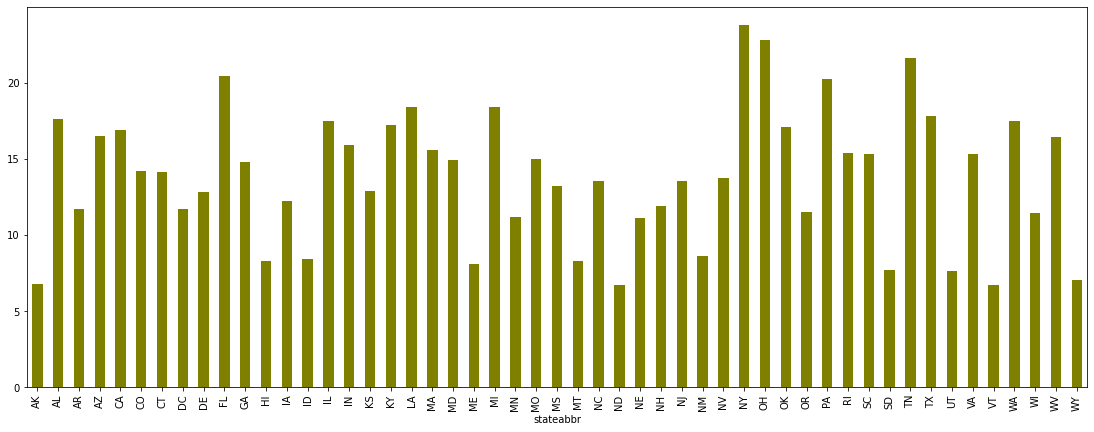

In [19]:
#COPD prevalence
plt.figure(figsize=(19,7)) # Figure size
census.groupby("stateabbr")['copd_crudeprev'].max().plot(kind='bar', color='olive')

In [20]:
#COPD Geospatial Analysis
state_geo = f"https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-states.json"

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data= census ,
    columns= ["stateabbr", "copd_crudeprev"],
    key_on="feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Crude prevalence of chronic obstructive pulmonary disease ",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [21]:
census=census.replace(to_replace =("ND","OK", "UT", 'AK', 'SD','AL','AR'),
                 value =("North Dakota", "Oklahoma", 'Utah', "Alaska", "South Dakota", "Alabama", "Arkansas"))

In [22]:
census=census.replace(to_replace =("NC","OR", "NV", 'AZ', 'SC','CA','CO'),
                 value =("North Carolina", "Oregon", 'Nevada', "Arizona", "South Carolina", "California", "Colorado"))

In [23]:
census=census.replace(to_replace =("MN","WY", "WV", 'WI', 'WA','VT','VA'),
                 value =("Minnessota", "Wyoming", 'West Virginia', "Wisconsin", "Washington", "Vermont", "Virginia"))

In [24]:
census=census.replace(to_replace =("FL","NE", "MT", 'HI', 'LA','NM','GA','KS'),
                 value =("Florida", "Nebraska", 'Montana', "Hawaii", "Louisiana", "New Mexico", "Georgia", "Kansas"))

In [25]:
census=census.replace(to_replace =("NY","NJ", "OH", 'RI', 'PA','TX','ID','KY'),
                 value =("New York", "New Jersey", 'Ohio', "Rhode Island", "Pennsylvania", "Texas", "Idaho", "Kentucky"))

In [26]:
census=census.replace(to_replace =("CT","DC", "DE", 'IA', 'IL','IN','MD','MA'),
                 value =("Connecticut", "District of Columbia", 'Delaware', "Iowa", "Illinios", "Indiana", "Maryland", "Massachussetts"))

In [27]:
census=census.replace(to_replace =("ME","MI", "MO", 'MS', 'TN'),
                 value =("Maine", "Michigan", 'Missouri', "Mississippi", "Tennessee"))

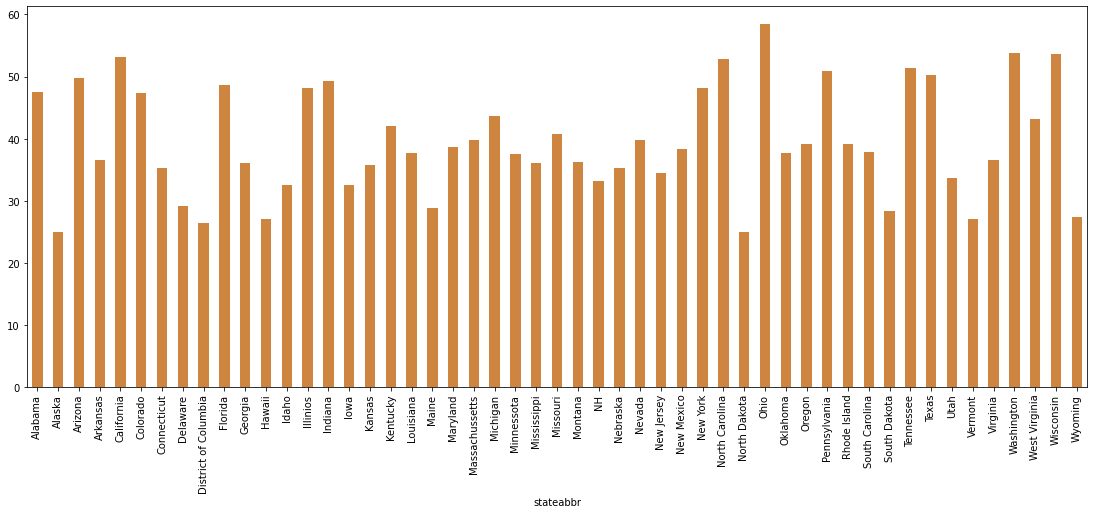

In [28]:
#arthritis prevalence
plt.figure(figsize=(19,7)) # Figure size
census.groupby("stateabbr")['arthritis_crudeprev'].max().plot(kind='bar', color='peru')

In [29]:
census=census.drop(['placename', 'geolocation'], axis = 1) 
census = census.rename(columns={'stateabbr': 'state'})

In [30]:
census = census.rename(columns={'bphigh_crudeprev': 'high bp prev', 'stroke_crudeprev': 'stroke prev'})


In [31]:
census=census.rename(columns={'diabetes_crudeprev': 'diabetes prev', 'cancer_crudeprev': 'cancer prev', 'arthritis_crudeprev': 'arthritis prev'})

In [32]:
census=census.rename(columns={'casthma_crudeprev': 'asthma prev', 'copd_crudeprev': 'copd prev', 'csmoking_crudeprev': 'smoking prev'})

In [33]:
census=census.rename(columns={'highchol_crudeprev': 'highChol prev', 'kidney_crudeprev': 'kidney prev'})
census

,state,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,Alabama,47.7,5.5,46.4,17.4,31.2,5.3,13.4,11.3,27.9,35.3,4.3
1,Alabama,48.2,6.1,47.8,19.8,30.5,4.7,12.5,11.9,29.3,36.8,4.6
2,Alabama,49.1,5.6,45.7,18.4,31.5,5.3,13.3,10.5,25.9,35.6,4.2
3,Alabama,54.1,7.3,48.0,22.4,35.0,6.0,13.6,12.3,26.3,38.4,5.3
4,Alabama,56.5,9.0,52.7,25.0,36.3,5.9,14.7,14.8,30.9,39.0,6.4
...,...,...,...,...,...,...,...,...,...,...,...,...
27205,Wyoming,29.0,2.5,28.9,8.1,22.9,6.3,9.5,5.8,18.0,30.5,2.5
27206,Wyoming,33.1,3.3,25.6,8.8,27.3,9.0,9.2,6.2,14.2,32.5,3.1
27207,Wyoming,27.8,2.3,27.7,7.4,22.0,6.4,9.4,5.3,17.4,29.1,2.3
27208,Wyoming,31.9,3.2,30.9,9.4,25.2,6.9,9.9,7.0,19.8,31.9,3.0


In [34]:
census.describe()

,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
count,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000,27210.000000
mean,30.653208,3.211466,30.472922,10.811062,21.430129,5.648912,9.741352,6.309960,17.973047,31.364296,3.099666
std,8.260472,1.449541,8.180685,4.269441,5.995361,1.803257,1.710538,2.545739,6.114202,4.887047,0.960904
min,5.300000,0.300000,9.600000,0.800000,2.400000,0.700000,5.600000,1.000000,2.000000,6.900000,0.700000
25%,25.300000,2.300000,24.500000,7.900000,17.300000,4.500000,8.500000,4.500000,13.400000,28.800000,2.500000
50%,29.500000,2.900000,29.500000,10.000000,21.000000,5.500000,9.400000,5.800000,17.100000,31.700000,2.900000
75%,34.900000,3.800000,35.600000,12.900000,25.100000,6.600000,10.700000,7.600000,21.700000,34.400000,3.600000
max,70.300000,19.500000,58.600000,39.500000,58.400000,22.900000,17.800000,23.800000,50.300000,55.400000,12.300000


In [35]:
census.corr().style.background_gradient(cmap='cividis')

,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
high bp prev,1.000000,0.929248,0.745852,0.899804,0.859888,0.414397,0.591753,0.852756,0.606235,0.767132,0.885130
stroke prev,0.929248,1.000000,0.740103,0.935041,0.784451,0.293622,0.668484,0.901332,0.684947,0.668650,0.962226
obesity_crudeprev,0.745852,0.740103,1.000000,0.775815,0.523238,-0.130160,0.718525,0.752574,0.851386,0.359479,0.706349
diabetes prev,0.899804,0.935041,0.775815,1.000000,0.676042,0.153268,0.579688,0.816148,0.665321,0.673546,0.944776
arthritis prev,0.859888,0.784451,0.523238,0.676042,1.000000,0.715015,0.480158,0.806639,0.437621,0.825677,0.746733
cancer prev,0.414397,0.293622,-0.130160,0.153268,0.715015,1.000000,-0.115426,0.290831,-0.233211,0.704001,0.302181
asthma prev,0.591753,0.668484,0.718525,0.579688,0.480158,-0.115426,1.000000,0.688672,0.777186,0.157677,0.607427
copd prev,0.852756,0.901332,0.752574,0.816148,0.806639,0.290831,0.688672,1.000000,0.803823,0.651424,0.861767
smoking prev,0.606235,0.684947,0.851386,0.665321,0.437621,-0.233211,0.777186,0.803823,1.000000,0.247406,0.630046
highChol prev,0.767132,0.668650,0.359479,0.673546,0.825677,0.704001,0.157677,0.651424,0.247406,1.000000,0.706735


**df on chronic illnesses in the US**

In [36]:
chronic = pd.read_csv(r"F:\Health\Data\u-s-chronic-disease-indicators-cdi.csv")

In [37]:
# iterating the columns 
for col in chronic.columns: 
    print(col)

yearstart
yearend
locationabbr
locationdesc
datasource
topic
question
response
datavalueunit
datavaluetype
datavalue
datavaluealt
datavaluefootnotesymbol
datavaluefootnote
lowconfidencelimit
highconfidencelimit
stratificationcategory1
stratification1
stratificationcategory2
stratification2
stratificationcategory3
stratification3
geolocation
responseid
locationid
topicid
questionid
datavaluetypeid
stratificationcategoryid1
stratificationid1
stratificationcategoryid2
stratificationid2
stratificationcategoryid3
stratificationid3


In [38]:
chronic=chronic[['locationdesc','topic','question','datavalue']]
#replace NaNs with zeros in the df
chronic=chronic.fillna(0)

In [39]:
chronic = chronic.rename(columns={'locationdesc': 'state','datavalue': 'rate of illness','topic': 'chronic illness','question': 'specific illness'})

In [40]:
chronic.head(3)

,state,chronic illness,specific illness,rate of illness
0,Washington,Cancer,"Cancer of the colon and rectum (colorectal), m...",15.2
1,Oregon,Cancer,"Invasive cancer (all sites combined), incidence",513.5
2,Florida,Cancer,"Cancer of the oral cavity and pharynx, mortality",0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

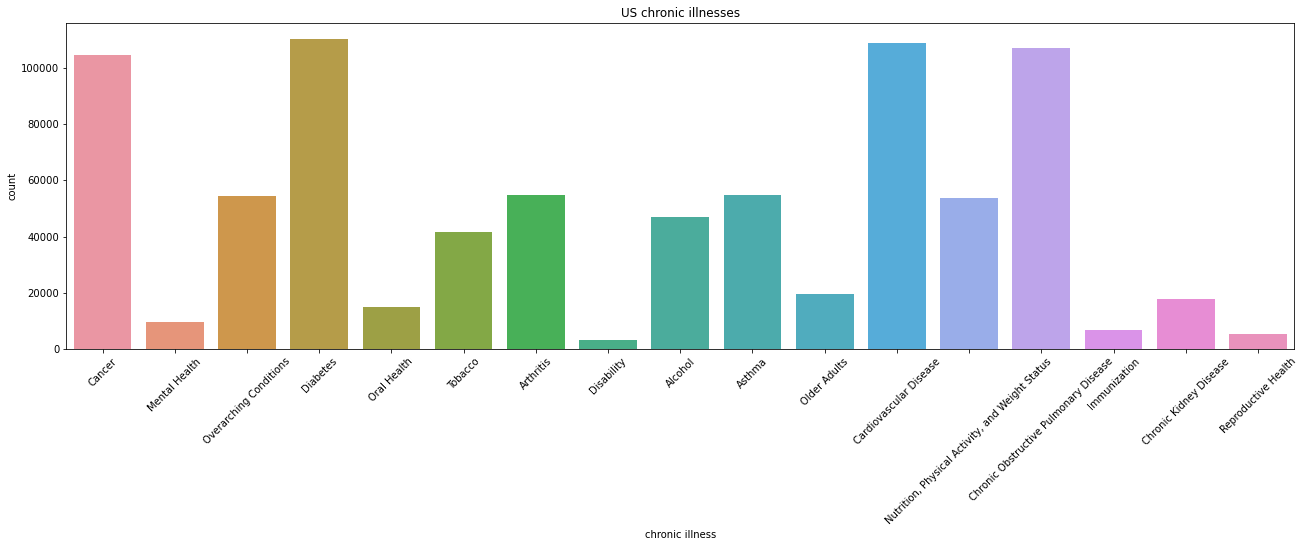

In [41]:
plt.figure(figsize=(22,6)) # Figure size
plt.title('US chronic illnesses') # Title
sns.countplot(chronic['chronic illness'])
plt.xticks(rotation=45)

In [42]:
chronic.describe()

,rate of illness
count,8.149370e+05
mean,6.474176e+02
std,1.577938e+04
min,0.000000e+00
25%,0.000000e+00
50%,1.890000e+01
75%,5.860000e+01
max,2.892731e+06


In [43]:
chronic.corr().style.background_gradient(cmap='cool')

,rate of illness
rate of illness,1.000000


**df of illness ranking**

In [44]:
rank = pd.read_csv(r"F:\Health\Data\us-county-health-rankings-2020.csv")


In [45]:
rank=rank[['state','num_deaths', 'percent_female','percent_excessive_drinking', 
           'num_uninsured','percent_vaccinated','percent_black','percent_american_indian_alaska_native',
           'percent_asian', 'percent_native_hawaiian_other_pacific_islander', 'percent_hispanic', 
           'percent_non_hispanic_white']]
rank.head()

,state,num_deaths,percent_female,percent_excessive_drinking,num_uninsured,percent_vaccinated,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white
0,Alabama,81791.0,51.633032,13.903515,438049.0,41.0,26.497733,0.703271,1.496909,0.106529,4.443264,65.413428
1,Alabama,791.0,51.448715,15.026031,4093.0,41.0,19.343177,0.480207,1.224798,0.111509,2.965774,74.308016
2,Alabama,2967.0,51.538377,17.958310,19119.0,44.0,8.783976,0.772399,1.150343,0.066966,4.646779,83.111337
3,Alabama,472.0,47.216752,12.844016,2136.0,37.0,48.032635,0.659137,0.454162,0.184880,4.276355,45.641252
4,Alabama,471.0,46.781250,15.570042,1727.0,38.0,21.120536,0.437500,0.236607,0.116071,2.625000,74.589286


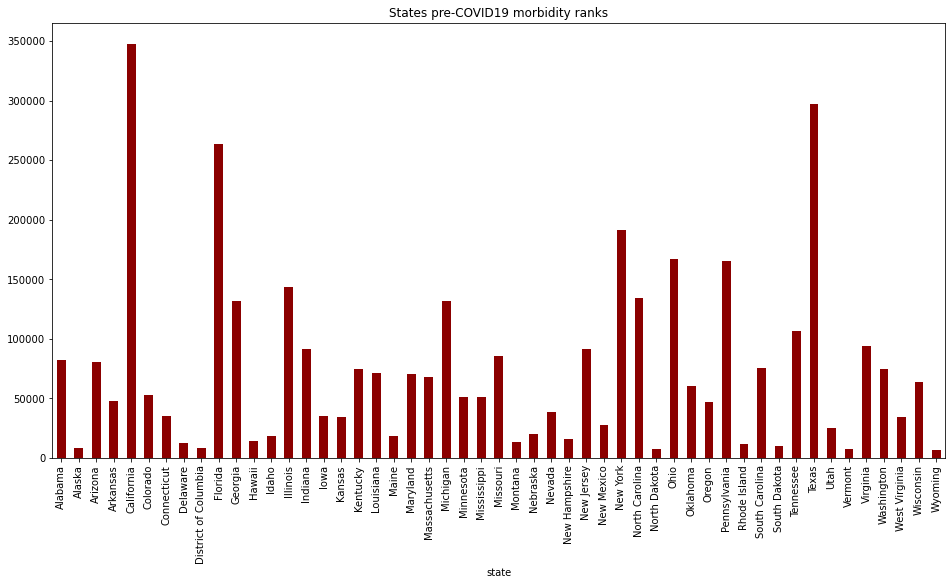

In [46]:
plt.figure(figsize=(16,8)) # Figure size
plt.title('States pre-COVID19 morbidity ranks') # Title
rank.groupby("state")['num_deaths'].max().plot(kind='bar', color='darkred')

In [47]:
rank.describe()

,num_deaths,percent_female,percent_excessive_drinking,num_uninsured,percent_vaccinated,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white
count,2900.000000,3193.000000,3193.000000,3.192000e+03,3175.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000,3193.000000
mean,2626.418621,49.896722,17.529522,1.718263e+04,41.810079,9.028171,2.348290,1.616180,0.145549,9.692285,75.863247
std,14147.013596,2.269008,3.148959,1.254077e+05,9.726319,14.247888,7.676425,3.031785,0.977015,13.790012,20.159411
min,32.000000,26.835097,7.809632,2.700000e+01,4.000000,0.000000,0.000000,0.000000,0.000000,0.610451,2.691288
25%,228.000000,49.422955,15.311526,9.000000e+02,36.000000,0.726788,0.386685,0.468422,0.032113,2.408442,63.959619
50%,487.500000,50.313328,17.578035,2.188000e+03,43.000000,2.322799,0.642200,0.752249,0.062692,4.456522,83.063727
75%,1187.000000,51.028709,19.677022,5.948250e+03,49.000000,10.366221,1.335736,1.491288,0.119946,10.209401,92.178182
max,347916.000000,56.870539,28.623739,4.704625e+06,66.000000,85.414352,92.515200,43.357041,48.863636,96.359551,97.887219


In [48]:
rank.corr().style.background_gradient(cmap='inferno')

,num_deaths,percent_female,percent_excessive_drinking,num_uninsured,percent_vaccinated,percent_black,percent_american_indian_alaska_native,percent_asian,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white
num_deaths,1.000000,0.068029,0.050155,0.908967,0.064967,0.045752,-0.024492,0.210361,0.032503,0.092489,-0.118771
percent_female,0.068029,1.000000,-0.181556,0.050904,0.197982,0.145850,-0.076683,0.006429,0.008550,-0.152432,0.024335
percent_excessive_drinking,0.050155,-0.181556,1.000000,0.031662,0.219661,-0.370705,0.010434,0.195179,0.012502,0.006310,0.220927
num_uninsured,0.908967,0.050904,0.031662,1.000000,0.047536,0.043366,-0.016370,0.171464,0.025633,0.116814,-0.130508
percent_vaccinated,0.064967,0.197982,0.219661,0.047536,1.000000,-0.016014,-0.195394,0.197756,-0.003264,-0.152129,0.152143
percent_black,0.045752,0.145850,-0.370705,0.043366,-0.016014,1.000000,-0.111603,0.021294,-0.025962,-0.107671,-0.590977
percent_american_indian_alaska_native,-0.024492,-0.076683,0.010434,-0.016370,-0.195394,-0.111603,1.000000,-0.012745,0.004008,0.005309,-0.312038
percent_asian,0.210361,0.006429,0.195179,0.171464,0.197756,0.021294,-0.012745,1.000000,0.262260,0.161942,-0.304274
percent_native_hawaiian_other_pacific_islander,0.032503,0.008550,0.012502,0.025633,-0.003264,-0.025962,0.004008,0.262260,1.000000,0.029543,-0.118212
percent_hispanic,0.092489,-0.152432,0.006310,0.116814,-0.152129,-0.107671,0.005309,0.161942,0.029543,1.000000,-0.611009


**df on COVID-19 Statistics**

In [49]:
stats = pd.read_csv(r"F:\Health\Data\covid-statistics-by-us-states-daily-updates.csv")
#replace NaNs with zeros in the df
stats=stats.fillna(0)


In [50]:
# iterating the columns 
for col in stats.columns: 
    print(col)

date
state
positive
negative
pending
hospitalized
death
total
hash
datechecked
totaltestresults
fips
deathincrease
hospitalizedincrease
negativeincrease
positiveincrease
totaltestresultsincrease


In [51]:
stats.drop(['hash', 'fips', 'datechecked'], axis=1, inplace=True)
stats.head()

,date,state,positive,negative,pending,hospitalized,death,total,totaltestresults,deathincrease,hospitalizedincrease,negativeincrease,positiveincrease,totaltestresultsincrease
0,2020-03-30,AK,114.0,3540.0,0.0,7.0,3.0,3654,3654,1.0,1.0,308.0,12.0,320.0
1,2020-03-30,AL,859.0,5694.0,0.0,0.0,6.0,6553,6553,2.0,0.0,1510.0,53.0,1563.0
2,2020-03-30,AR,473.0,5262.0,0.0,62.0,7.0,5735,5735,1.0,14.0,2235.0,47.0,2282.0
3,2020-03-30,AS,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
4,2020-03-30,AZ,1157.0,15602.0,0.0,78.0,20.0,16759,16759,3.0,0.0,2649.0,238.0,2887.0


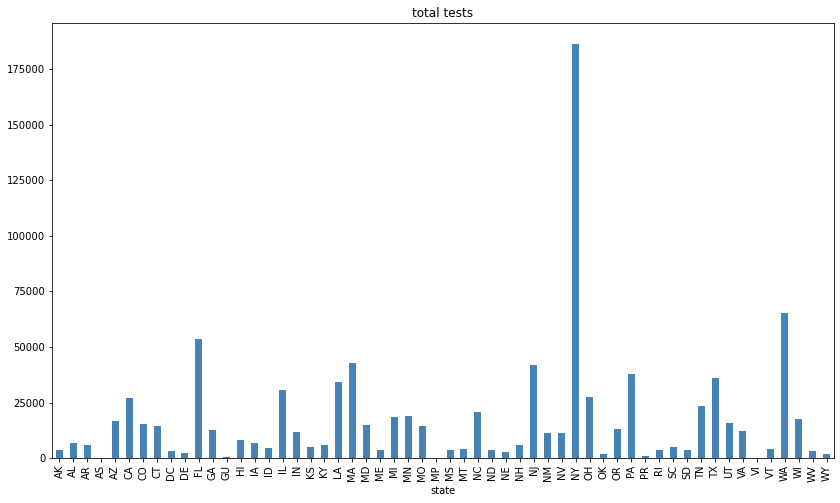

In [52]:
plt.figure(figsize=(14,8)) # Figure size
plt.title('total tests') # Title
stats.groupby("state")['totaltestresults'].max().plot(kind='bar', color='steelblue')

In [53]:
stats=stats[['date', 'state','positive','negative','hospitalized', 'death']]
stats.head()

,date,state,positive,negative,hospitalized,death
0,2020-03-30,AK,114.0,3540.0,7.0,3.0
1,2020-03-30,AL,859.0,5694.0,0.0,6.0
2,2020-03-30,AR,473.0,5262.0,62.0,7.0
3,2020-03-30,AS,0.0,0.0,0.0,0.0
4,2020-03-30,AZ,1157.0,15602.0,78.0,20.0


In [54]:
stats=stats.replace(to_replace ="WA",
                 value ="Washington")

In [55]:
stats=stats.replace(to_replace ="SC", 
                 value ="South Carolina")

In [56]:
stats=stats.replace(to_replace =("NJ","FL", 'AL', "TX", "OR"),
                 value =("New Jersey", "Florida", "Alabama", "Texas", "Oregon"))

In [57]:
stats=stats.replace(to_replace =("AR","AZ", "NY", "CA", "AK"),
                 value =("Arkansas", "Arizona", 'New York', "California", "Alaska"))

In [58]:
stats=stats.replace(to_replace =("MT","WI", "NC", 'OH',"RI", "VA"),
                 value =("Montana", "Wisconsin", 'North Carolina','Ohio', "Rhode Island", 'Virginia'))

In [59]:
stats=stats.replace(to_replace =("TN","GA", "IL", 'NH', "MA"),
                 value =("Tennessee", "Georgia", 'Illinios', "New Hampshire", "Massachussetts"))

In [60]:
stats=stats.replace(to_replace =("CO","CT", "DC", 'DE', "GU"),
                 value =("Colorado", "Connecticut", 'District of Columbia', "Delaware", "Guam"))

In [61]:
stats=stats.replace(to_replace =("HI","IA", "ID", 'IN', "KS", 'KY'),
                 value =("Hawaii", "Iowa", 'Idaho', "Indiana", "Kansas", "Kentucky"))

In [62]:
stats=stats.replace(to_replace =("LA","MD", "MN", 'MI', "MO", 'MS'),
                 value =("Louisiana", "Maryland", 'Minnessota', "Michigan", "Missouri", "Missippippi"))

In [63]:
stats=stats.replace(to_replace =("ME","NV", "WV", 'NM', 'PA', "VT"),
                 value =("Maine", "Nevada", 'West Virginia', "New Mexico", "Pennsylvania", "Vermont"))

In [64]:
stats=stats.replace(to_replace =("ND","OK", "UT", 'PR', 'SD'),
                 value =("North Dakota", "Oklahoma", 'Utah', "Puerto Rico", "South Dakota"))

In [65]:
stats=stats.replace(to_replace =("VI","WY", "NE"),
                 value =("Virgin Islands", "Wyoming", "Nebraska"))

In [66]:
stats.head(3)

,date,state,positive,negative,hospitalized,death
0,2020-03-30,Alaska,114.0,3540.0,7.0,3.0
1,2020-03-30,Alabama,859.0,5694.0,0.0,6.0
2,2020-03-30,Arkansas,473.0,5262.0,62.0,7.0


In [67]:
stats.describe()

,positive,negative,hospitalized,death
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,634.005831,3451.974490,73.656706,9.915452
std,3588.102942,9361.701171,663.646731,54.422357
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,39.000000,0.000000,0.000000
50%,43.500000,313.000000,0.000000,0.000000
75%,247.250000,2579.500000,0.000000,3.000000
max,66497.000000,119971.000000,13721.000000,1218.000000


In [68]:
stats.corr().style.background_gradient(cmap='plasma')

,positive,negative,hospitalized,death
positive,1.000000,0.847389,0.956082,0.946130
negative,0.847389,1.000000,0.769908,0.829803
hospitalized,0.956082,0.769908,1.000000,0.932979
death,0.946130,0.829803,0.932979,1.000000


# What could be the risks across the US?   
In combining some of the dataframes provided by ROCHE, I visualize below some factors along with #COVID19 data.   
Further statistical analysis would be needed to reach scientific conclusion in this data.   
However, the presentation here could help in identifying future research angles relating to risk factors and   
COVID-19.   

In [69]:
# Merging the dataframes                       
a=pd.merge(USA, stats, how ='inner', on =('state', "date"))
a

,date,state,cases,deaths,positive,negative,hospitalized,death
0,2020-03-04,Arizona,2,0,2.0,27.0,0.0,0.0
1,2020-03-04,California,2,0,53.0,462.0,0.0,0.0
2,2020-03-04,California,1,0,53.0,462.0,0.0,0.0
3,2020-03-04,California,1,0,53.0,462.0,0.0,0.0
4,2020-03-04,California,7,0,53.0,462.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19269,2020-03-30,Wyoming,8,0,94.0,1840.0,17.0,0.0
19270,2020-03-30,Wyoming,1,0,94.0,1840.0,17.0,0.0
19271,2020-03-30,Wyoming,2,0,94.0,1840.0,17.0,0.0
19272,2020-03-30,Wyoming,17,0,94.0,1840.0,17.0,0.0


In [70]:
dfs1=pd.concat([a,rank,chronic], sort=True) 
dfs1.head()

,cases,chronic illness,date,death,deaths,hospitalized,negative,num_deaths,num_uninsured,percent_american_indian_alaska_native,...,percent_excessive_drinking,percent_female,percent_hispanic,percent_native_hawaiian_other_pacific_islander,percent_non_hispanic_white,percent_vaccinated,positive,rate of illness,specific illness,state
0,2.0,NaN,2020-03-04,0.0,0.0,0.0,27.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,Arizona
1,2.0,NaN,2020-03-04,0.0,0.0,0.0,462.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,NaN,NaN,California
2,1.0,NaN,2020-03-04,0.0,0.0,0.0,462.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,NaN,NaN,California
3,1.0,NaN,2020-03-04,0.0,0.0,0.0,462.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,NaN,NaN,California
4,7.0,NaN,2020-03-04,0.0,0.0,0.0,462.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,NaN,NaN,California


In [71]:
# Merging the dataframes                       
b=pd.concat([dfs1, Vuln], sort=False) 

In [72]:
# Merging the dataframes                       
c=pd.concat([b, census], sort=False) 


In [73]:
#replace NaNs with zeros in the df
c=c.fillna(0)
c.head()

,cases,chronic illness,date,death,deaths,hospitalized,negative,num_deaths,num_uninsured,percent_american_indian_alaska_native,...,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,2.0,0,2020-03-04,0.0,0.0,0.0,27.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0,2020-03-04,0.0,0.0,0.0,462.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,2020-03-04,0.0,0.0,0.0,462.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0,2020-03-04,0.0,0.0,0.0,462.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,0,2020-03-04,0.0,0.0,0.0,462.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
# iterating the columns to list their names
for col in c.columns: 
    print(col)

cases
chronic illness
date
death
deaths
hospitalized
negative
num_deaths
num_uninsured
percent_american_indian_alaska_native
percent_asian
percent_black
percent_excessive_drinking
percent_female
percent_hispanic
percent_native_hawaiian_other_pacific_islander
percent_non_hispanic_white
percent_vaccinated
positive
rate of illness
specific illness
state
e_uninsur
epl_pov
epl_unemp
epl_age65
epl_age17
epl_disabl
high bp prev
stroke prev
obesity_crudeprev
diabetes prev
arthritis prev
cancer prev
asthma prev
copd prev
smoking prev
highChol prev
kidney prev


In [75]:
# Grouped df by date and state and extract a number of stats from each group
d=c.groupby(
   ['date', 'state'], as_index = False
).agg(
    {
         'hospitalized':max,    # max values 
         'cases':max,
         'deaths': max,
         'num_uninsured':max, 
         'percent_vaccinated': max, 
         'num_uninsured': max,
         'percent_american_indian_alaska_native':max,        
         'percent_asian':max,
         'percent_black':max,        
        'percent_excessive_drinking':max,
        'percent_female':max,
        'percent_hispanic':max,
        'percent_native_hawaiian_other_pacific_islander':max,
        'percent_non_hispanic_white':max,
        'epl_pov':max,
        'epl_unemp': max,
        'epl_age65':max,
        'epl_age17':max,
        'epl_disabl':max,
        'high bp prev':max,
        'stroke prev':max,
        'obesity_crudeprev':max,
        'diabetes prev':max,
        'arthritis prev':max,
        'cancer prev':max,
        'asthma prev':max,
        'copd prev':max,
        'smoking prev':max,
        'highChol prev':max,
        'kidney prev':max
         
    }
)
d

,date,state,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,...,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,0,Alabama,0.0,0.0,0.0,438049.0,49.0,7.858102,4.194192,80.047725,...,11.7,54.4,33.1,47.5,12.7,17.0,17.6,35.9,46.2,8.4
1,0,Alaska,0.0,0.0,0.0,94727.0,43.0,92.231723,43.357041,10.412518,...,3.6,42.9,11.6,24.9,8.3,10.6,6.8,28.7,36.2,3.4
2,0,Arizona,0.0,0.0,0.0,685974.0,47.0,74.949177,4.597735,5.466144,...,8.4,46.1,20.7,49.7,18.8,13.1,16.5,30.9,52.1,8.0
3,0,Arkansas,0.0,0.0,0.0,226179.0,54.0,3.325748,4.736484,61.439902,...,7.3,47.0,21.0,36.6,9.7,12.3,11.7,35.1,40.2,5.5
4,0,California,0.0,0.0,0.0,2740078.0,50.0,23.887375,38.310616,13.747565,...,10.0,49.7,25.5,53.2,22.9,13.7,16.9,36.4,50.5,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,2020-03-30,Virginia,136.0,225.0,3.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1207,2020-03-30,Washington,254.0,2332.0,152.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1208,2020-03-30,West Virginia,1.0,31.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1209,2020-03-30,Wisconsin,0.0,663.0,10.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
sub1=d[d.date==0]
sub2=d[d.date!=0]

In [77]:
sub2=sub2[['state', 'cases', 'deaths', 'hospitalized']]
sub2.head()

,state,cases,deaths,hospitalized
60,Arizona,2.0,0.0,0.0
61,California,14.0,1.0,0.0
62,Florida,2.0,0.0,0.0
63,Georgia,2.0,0.0,0.0
64,New Hampshire,2.0,0.0,0.0


In [78]:
# Merging the dataframes                       
risks=pd.merge(sub1, sub2, how ='inner', on ='state')
risks=risks.drop(['date'], axis = 1) 


In [79]:
sum_column = risks["hospitalized_x"] + risks["hospitalized_y"]
risks["hospitalized"] = sum_column


In [80]:
risks=risks.drop(['hospitalized_x','hospitalized_y'], axis = 1) 

In [81]:
sum_column2 = risks["cases_x"] + risks["cases_y"]
risks["cases"] = sum_column2
sum_column3 = risks["deaths_x"] + risks["deaths_y"]
risks["deaths"] = sum_column3

In [82]:
risks=risks.drop(['cases_x','cases_y', 'deaths_x','deaths_y'], axis = 1) 
risks

,state,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,percent_hispanic,percent_native_hawaiian_other_pacific_islander,...,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev,hospitalized,cases,deaths
0,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,2.0,0.0
1,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,6.0,0.0
2,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,13.0,0.0
3,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,17.0,0.0
4,Alabama,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,54.536580,17.750215,0.749655,...,47.5,12.7,17.0,17.6,35.9,46.2,8.4,0.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,0.0,15.0,0.0
1147,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,11.0,18.0,0.0
1148,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,14.0,21.0,0.0
1149,Wyoming,67560.0,51.0,22.086464,3.611305,2.417758,25.533577,54.313233,18.235255,0.157952,...,27.3,9.0,10.9,7.0,26.3,33.5,3.1,15.0,23.0,0.0


In [83]:
# Grouped df by date and state and extract a number of stats from each group
r=risks.groupby(
   ['state'], as_index = False).agg(    
    {
         'hospitalized':max,    # max values 
         'cases':max,
         'deaths': max,
         'num_uninsured':max, 
         'percent_vaccinated': max, 
         'num_uninsured': max,
         'percent_american_indian_alaska_native':max,        
         'percent_asian':max,
         'percent_black':max,        
        'percent_excessive_drinking':max,
        'percent_female':max,
        'percent_hispanic':max,
        'percent_native_hawaiian_other_pacific_islander':max,
        'percent_non_hispanic_white':max,
        'epl_pov':max,
        'epl_unemp': max,
        'epl_age65':max,
        'epl_age17':max,
        'epl_disabl':max,
        'high bp prev':max,
        'stroke prev':max,
        'obesity_crudeprev':max,
        'diabetes prev':max,
        'arthritis prev':max,
        'cancer prev':max,
        'asthma prev':max,
        'copd prev':max,
        'smoking prev':max,
        'highChol prev':max,
        'kidney prev':max
         
    }
)

r

,state,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,...,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
0,Alabama,0.0,257.0,4.0,438049.0,49.0,7.858102,4.194192,80.047725,17.958310,...,11.7,54.4,33.1,47.5,12.7,17.0,17.6,35.9,46.2,8.4
1,Alaska,7.0,61.0,2.0,94727.0,43.0,92.231723,43.357041,10.412518,24.608028,...,3.6,42.9,11.6,24.9,8.3,10.6,6.8,28.7,36.2,3.4
2,Arizona,78.0,690.0,6.0,685974.0,47.0,74.949177,4.597735,5.466144,18.210424,...,8.4,46.1,20.7,49.7,18.8,13.1,16.5,30.9,52.1,8.0
3,Arkansas,62.0,99.0,4.0,226179.0,54.0,3.325748,4.736484,61.439902,17.894979,...,7.3,47.0,21.0,36.6,9.7,12.3,11.7,35.1,40.2,5.5
4,California,1432.0,2474.0,44.0,2740078.0,50.0,23.887375,38.310616,13.747565,23.872978,...,10.0,49.7,25.5,53.2,22.9,13.7,16.9,36.4,50.5,7.8
5,Colorado,414.0,465.0,11.0,410250.0,58.0,14.056885,6.721816,10.514807,26.609421,...,7.3,44.1,19.1,47.3,17.9,13.7,14.2,41.5,50.1,6.0
6,Connecticut,517.0,1445.0,21.0,182122.0,58.0,1.178856,5.851145,13.239655,19.401189,...,8.2,45.6,23.9,35.3,9.6,15.4,14.1,30.9,41.7,6.9
7,Delaware,45.0,156.0,3.0,46586.0,55.0,1.113020,5.761663,25.466256,19.438831,...,7.5,51.9,22.4,29.1,9.0,14.6,12.8,35.4,36.8,5.6
8,District of Columbia,0.0,495.0,9.0,24833.0,38.0,0.611569,4.416653,44.890705,27.313018,...,6.9,43.6,17.5,26.4,10.5,15.3,11.7,36.5,39.8,4.9
9,Florida,652.0,1700.0,12.0,2615963.0,50.0,5.187992,6.260279,55.122674,22.406818,...,13.6,52.1,30.9,48.6,19.8,14.4,20.4,37.9,51.4,8.9


In [84]:
r.describe()

,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,...,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
count,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,437.200000,1321.380000,31.120000,5.163071e+05,51.340000,19.905607,9.734789,25.185511,21.042166,49.337724,...,7.518000,43.600000,20.57600,36.438000,12.428000,12.920000,12.754000,31.888000,40.026000,5.758000
std,1940.741264,5369.486807,130.180666,8.198963e+05,14.199181,28.423377,10.186725,24.344860,6.097375,12.667344,...,3.806476,14.849985,9.26619,13.895865,5.428723,4.313056,5.774618,11.717903,13.121781,2.449747
min,0.000000,24.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,116.250000,2.250000,8.951675e+04,50.000000,1.149663,4.470841,5.676591,19.483140,51.554145,...,5.025000,41.425000,14.25000,29.975000,9.625000,12.125000,8.325000,28.900000,38.700000,4.825000
50%,40.000000,219.500000,4.000000,2.755745e+05,54.500000,6.124142,5.547147,13.493610,22.488174,51.854618,...,8.200000,49.550000,22.60000,37.650000,12.050000,13.950000,13.600000,34.100000,42.300000,6.000000
75%,146.000000,638.000000,10.750000,5.393885e+05,58.750000,21.262682,11.127173,40.171529,24.160758,53.067907,...,9.675000,52.050000,26.42500,47.450000,16.000000,15.400000,16.800000,38.475000,48.125000,7.300000
max,13721.000000,38087.000000,914.000000,4.704625e+06,66.000000,92.515200,43.357041,80.047725,28.623739,56.870539,...,19.500000,58.600000,39.50000,58.400000,22.900000,17.800000,23.800000,50.300000,55.400000,12.300000


In [85]:
r.corr().style.background_gradient(cmap='cubehelix')

,hospitalized,cases,deaths,num_uninsured,percent_vaccinated,percent_american_indian_alaska_native,percent_asian,percent_black,percent_excessive_drinking,percent_female,percent_hispanic,percent_native_hawaiian_other_pacific_islander,percent_non_hispanic_white,epl_pov,epl_unemp,epl_age65,epl_age17,epl_disabl,high bp prev,stroke prev,obesity_crudeprev,diabetes prev,arthritis prev,cancer prev,asthma prev,copd prev,smoking prev,highChol prev,kidney prev
hospitalized,1.000000,0.985888,0.978912,0.160146,0.051867,-0.088147,0.275802,0.074041,0.111628,0.062345,0.203869,-0.037178,0.086176,0.069697,0.073782,0.073979,0.074716,0.070994,0.232120,0.511607,0.107496,0.346648,0.171139,0.221188,0.160320,0.336615,0.159140,0.209640,0.439131
cases,0.985888,1.000000,0.989956,0.148110,0.052875,-0.083776,0.287362,0.056660,0.111102,0.060579,0.205805,-0.038920,0.082998,0.066154,0.070768,0.070476,0.071551,0.067685,0.236613,0.508750,0.107727,0.346717,0.172855,0.215320,0.166806,0.333192,0.157319,0.210221,0.441678
deaths,0.978912,0.989956,1.000000,0.123793,0.046989,-0.081097,0.279249,0.050041,0.112931,0.058311,0.203418,-0.038229,0.084593,0.065312,0.069672,0.069114,0.070189,0.066906,0.237057,0.504687,0.104384,0.341050,0.174815,0.215993,0.161876,0.334503,0.153839,0.207275,0.439287
num_uninsured,0.160146,0.148110,0.123793,1.000000,0.140424,-0.120041,0.338259,0.299524,0.188817,0.182634,0.641747,-0.060177,0.162743,0.193050,0.203517,0.201279,0.206555,0.196075,0.420630,0.436488,0.313556,0.446716,0.439294,0.562162,0.234082,0.446999,0.331782,0.391388,0.441810
percent_vaccinated,0.051867,0.052875,0.046989,0.140424,1.000000,0.193439,0.132550,0.255068,0.819539,0.918983,0.239241,-0.024971,0.914288,0.881511,0.873162,0.879036,0.868002,0.874139,0.678721,0.517481,0.733990,0.567300,0.674734,0.568725,0.734845,0.551598,0.676464,0.733203,0.590233
percent_american_indian_alaska_native,-0.088147,-0.083776,-0.081097,-0.120041,0.193439,1.000000,0.087484,-0.301798,0.229436,0.137246,0.152896,-0.074090,0.176198,0.189972,0.214130,0.180577,0.225491,0.187252,-0.047824,-0.182883,0.016381,-0.198576,0.073853,0.154252,-0.061737,-0.210614,-0.051543,0.102800,-0.074871
percent_asian,0.275802,0.287362,0.279249,0.338259,0.132550,0.087484,1.000000,0.034766,0.276097,0.241055,0.314341,0.503613,0.026015,0.236790,0.269663,0.240464,0.270746,0.249891,0.227849,0.242468,0.278943,0.258289,0.186327,0.275579,0.208542,0.175282,0.224695,0.276140,0.298220
percent_black,0.074041,0.056660,0.050041,0.299524,0.255068,-0.301798,0.034766,1.000000,0.184778,0.331665,0.037129,-0.122184,0.265790,0.180297,0.197139,0.190424,0.201383,0.183973,0.588308,0.616930,0.556895,0.635399,0.399136,0.297420,0.536937,0.558479,0.594258,0.379818,0.547381
percent_excessive_drinking,0.111628,0.111102,0.112931,0.188817,0.819539,0.229436,0.276097,0.184778,1.000000,0.871368,0.268813,0.032961,0.743984,0.690470,0.689929,0.687845,0.691509,0.689792,0.582813,0.426323,0.630942,0.441213,0.578606,0.565548,0.659148,0.448047,0.630430,0.682617,0.501583
percent_female,0.062345,0.060579,0.058311,0.182634,0.918983,0.137246,0.241055,0.331665,0.871368,1.000000,0.287662,0.074134,0.855198,0.851838,0.849552,0.851550,0.846324,0.851114,0.725148,0.535199,0.773561,0.601714,0.681651,0.587484,0.785250,0.591688,0.721800,0.788542,0.624500


While not verified, there could be correlation among risk factors presented above.   
For example, there seems to be correlation between deaths, cases, and hospitalization.      
However, a statistically-sound correlation does not mean causation.   